# **Hearth Attack Analysis**

### Información de kaggle respecto a que representa cada variable.

**Edad** : Edad del paciente
 
**Sexo** : Sexo del paciente
 
**exang**: angina inducida por el ejercicio (1 = sí; 0 = no)
 
**ca**: número de buques principales (0-3)
 
**cp** : Tipo de dolor torácico:
 
*Valor 1*: angina típica
 
*Valor 2*: angina atípica
 
*Valor 3*: dolor no anginoso
 
*Valor 4*: asintomático
 
 
**trtbps**: presión arterial en reposo (en mm Hg)
 
**chol**: colesterol en mg/dl obtenido a través del sensor BMI
 
**fbs**: (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
 
**rest_ecg** : resultados electrocardiográficos en reposo
 
*Valor 0*: normal
 
*Valor 1*: tener anomalías en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)
 
*Valor 2*: mostrar hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes
 
**thalach**: frecuencia cardíaca máxima alcanzada
 
**objetivo**: 0= menos posibilidades de ataque al corazón 1= más posibilidades de ataque al corazón
 



##  **1) Análisis exploratorio (EDA)**

 
 
##### 1.1) Cuál es la pregunta que deseamos responder?
##### 1.2) Veamos un poco el dataset.
##### 1.3) Analisemos los tipos de datos que contiene nuestro dataset.
##### 1.4) Estadística descriptiva.
##### 1.5) Visualización.
##### 1.6) Interacciones entre las variables.
##### 1.7) Conclusiones del análisis exploratorio (EDA).
 
 
 




##### **1.1) Cuál es el objetivo de este análisis?**
 
Nuestro objetivo principal es predecir si las personas son propensas a sufrir un ataque cardíaco o no.
Para lograr esto, vamos a analizar el dataset heart.csv que contiene información de diferentes personas que ya fueron diagnosticadas. Luego, vamos a entrenar un algoritmo para predecir a futuros pacientes que tengan algunos de estos síntomas.



**1.2) Análisis del dataset**



In [1]:
# Importamos las librerias

import pandas as pd
import numpy as np

# Librerias para visualizar
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Train test split
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f'Filas y Columnas:\n{data.shape}')

Filas y Columnas:
(303, 14)


In [5]:
print(f'Nombres de nuestras columnas: \n\n{data.columns}')

Nombres de nuestras columnas: 

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


**1.3) Tipos de datos**

In [6]:
print(f'Tipos de datos de nuestro dataset: \n\n{data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Tipos de datos de nuestro dataset: 

None


**1.4) Descripción estadística de los datos**



In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**1.5) Visualización de los datos**



In [8]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


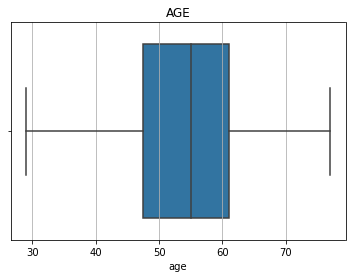

	Valores entre el mínimo y el máximo
29 47.5 55.0 61.0 77
--------------------------------------------------


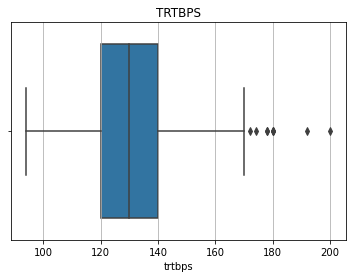

	Valores entre el mínimo y el máximo
94 120.0 130.0 140.0 200
--------------------------------------------------


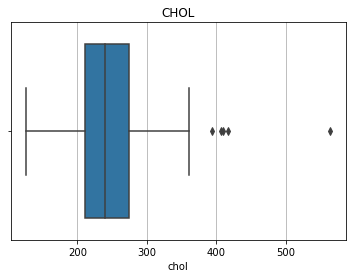

	Valores entre el mínimo y el máximo
126 211.0 240.0 274.5 564
--------------------------------------------------


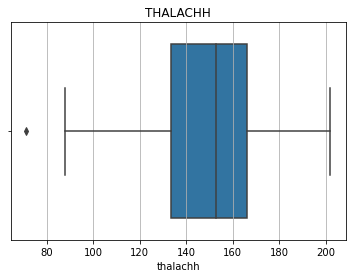

	Valores entre el mínimo y el máximo
71 133.5 153.0 166.0 202
--------------------------------------------------


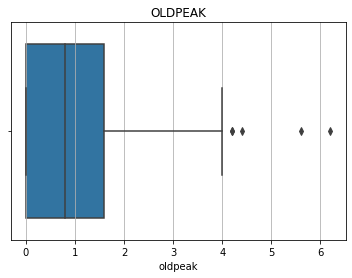

	Valores entre el mínimo y el máximo
0.0 0.0 0.8 1.6 6.2
--------------------------------------------------


In [9]:
data_col = ['age','trtbps',
            'chol', 'thalachh',
            'oldpeak']


for  col in data_col:
  plt.figure(figsize=(6,4))
  plt.title(col.upper())
  plt.grid(True)
  sns.boxplot(data=data, x=col, hue=col)
  plt.show()
  print('	Valores entre el mínimo y el máximo')
  print(np.min(data[col]), np.quantile(data[col], 0.25), np.median(data[col]), np.quantile(data[col], 0.75), np.max(data[col]))
  print('-'*50)

Podemos ver que en todos los gráficos excepto el de edad, todos tienen algunos valores atípicos(**outliers**). Estos los vamos a tratar más adelante.



#### Vamos a comparar los valores categóricos.



En primer lugar, comprobamos los valores únicos de estas variables.



In [10]:
valores_categoricos = ['sex', 'cp', 'fbs', 'restecg', 'exng' ,'slp',
                       'caa','thall', 'output']

for i in valores_categoricos:
  print(f'Valores únicos de: {i}\n{data[i].unique()}\n')

Valores únicos de: sex
[1 0]

Valores únicos de: cp
[3 2 1 0]

Valores únicos de: fbs
[1 0]

Valores únicos de: restecg
[0 1 2]

Valores únicos de: exng
[0 1]

Valores únicos de: slp
[0 2 1]

Valores únicos de: caa
[0 2 1 3 4]

Valores únicos de: thall
[1 2 3 0]

Valores únicos de: output
[1 0]



### Suma de la variable dependiente para ver si los datos están desbalanceados.





In [11]:
datos_output = data['output'].value_counts()
print(datos_output)

1    165
0    138
Name: output, dtype: int64


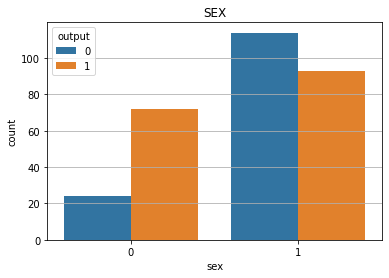

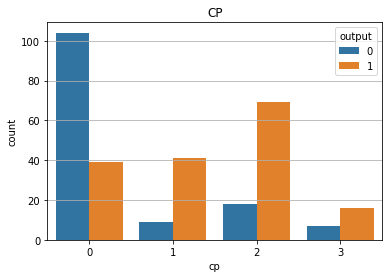

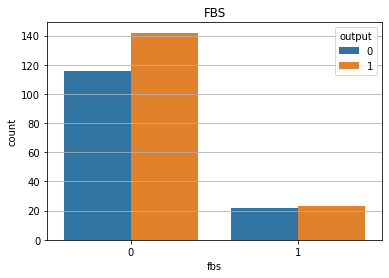

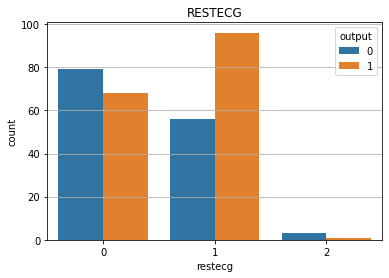

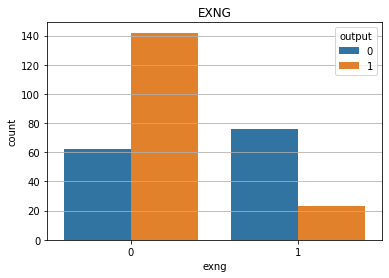

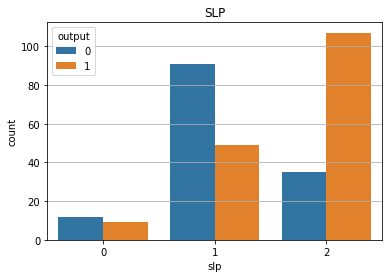

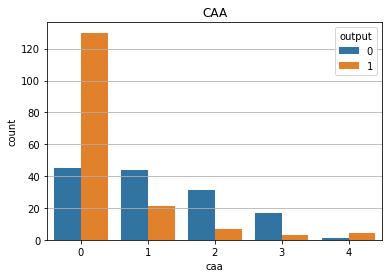

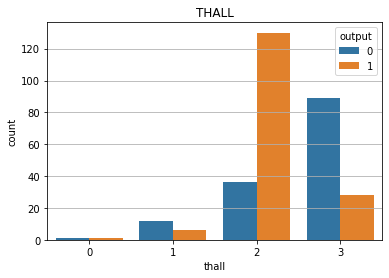

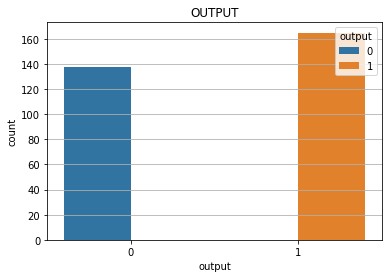

In [12]:
for cat in valores_categoricos:
  plt.figure(figsize=(6,4))
  plt.title(cat.upper())
  plt.grid(True)
  sns.countplot(data=data, x=cat, hue='output')
  plt.show()

**1.6) Interacciones entre las variables**

Vamos a graficar una matriz de correlación para ver la relación que hay entre la variable output y las demás.



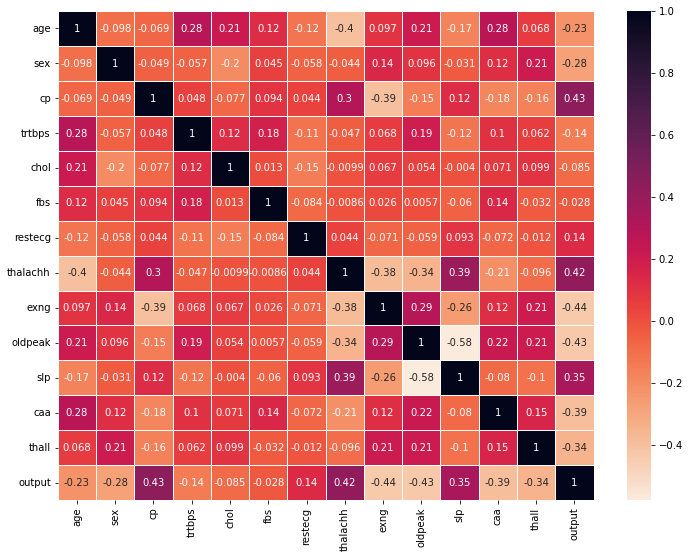

In [14]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), annot=True, linewidth=.5, cmap="rocket_r")
plt.show()

**1.7) Conclusiones del análisis exploratorio (EDA)**



Contamos con un dataset de 303 filas y 14 columnas. Cabe aclarar que en kaggle, no explica de que se tratan las variables oldpeak, slp y thall. Buscando información, solo pude encontrar información sobre oldpeak:
 
**oldpeak** Es un dolor opresivo que causa ardor. A veces se acompaña de náuseas, sudoración excesiva, dificultad para respirar y pérdida de conocimiento.
 
Los tipos de datos que vamos a manejar son numéricos(discretos y continuos) y categóricos(ordinales).
Además, con el código info() podemos ver que no tenemos valores nulos.
 
Con respecto a la descripción estadística, nos indica que la **media de edad en los pacientes es de 54** (no tenemos outliers que nos modifiquen la media).
La **frecuencia cardíaca es de 149**, del **colesterol 246** y la **presión arterial en reposo de 131**.
 
 



## **2) Limpieza de datos**

Vamos a realizar una limpieza de datos. Si bien ya sabemos algunos detalles, repasamos de forma breve algunos puntos a tener en cuenta para tener el dataset preparado para el entrenamiento.



##### 2.1) Datos faltantes en las celdas.
 
##### 2.2) Datos repetidos en filas.
 
##### 2.3) Revisar los outliers que vimos en los gráficos de caja y tomar decisiones respecto a ellos.



**2.1) Datos faltantes en las celdas**

In [15]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**2.2) Datos repetidos en filas**

In [16]:
print(f'Tamaño de filas originales: {data.shape}\n')
data.drop_duplicates(inplace=True)
print(f'Tamaño de filas eliminando los duplicados: {data.shape}')

Tamaño de filas originales: (303, 14)

Tamaño de filas eliminando los duplicados: (302, 14)


**2.4) Revisar los outliers**

Si observamos un poco los valores extremos de las boxplot (**Punto (1.5)**) vamos a ver que no son muchos pacientes que tengan el colesterol o la presión arterial muy alta. Podemos decir que es posible que se presenten personas con estas características. Por lo tanto, no modificaremos ninguno de esos valores. 





---



## **3) Algoritmos de Machine Learning**

Una vez terminado el análisis y la limpieza de los datos, vamos a crear diferentes algoritmos para predecir a futuros pacientes y tomar medidas en contra de los problemas cardiovasculares.
 
Primero vamos a utilizar Standard Scaler y dividir los datos en entrenamiento y testeo
##### 3.1) Estandarizar los valores.
 
##### 3.2) Algoritmos de aprendizaje supervisado
 
##### KNN (Vecinos más cercanos)
##### Bayes Ingenuo
##### Máquinas de soporte vectorial
##### Árboles de decisión
##### LDA
##### 3.6) Comparamos efectividad con métricas y matriz de confusión



**3.1) Standar Scaler y Train Test Split**

In [17]:
y = data['output'].values
X = data.drop(columns='output').values

print(X)
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [18]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
print(data_sc)

NameError: name 'data_sc' is not defined

In [19]:
# Utilizamos train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (241, 13)
X_test: (61, 13)
y_train: (241,)
y_test: (61,)


In [20]:
# Librerias

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [21]:
algoritmos = {
    'Knn' : KNeighborsClassifier(n_neighbors=3),
    'Bayes' : GaussianNB(),
    'SVectorial' : svm.SVC(),
    'Arboles_decision' : DecisionTreeClassifier(),
    'LDA' : LDA()
}

Matriz de confusión del algoritmo Knn



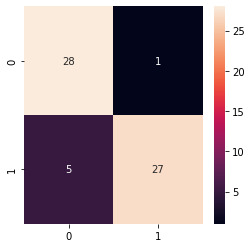


Reporte de metricas:

              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61


------------------------------------------------------------
Matriz de confusión del algoritmo Bayes



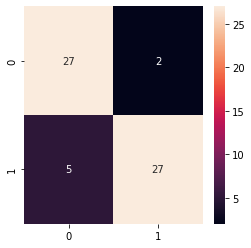


Reporte de metricas:

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61


------------------------------------------------------------
Matriz de confusión del algoritmo SVectorial



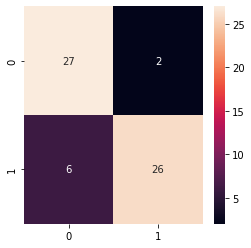


Reporte de metricas:

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


------------------------------------------------------------
Matriz de confusión del algoritmo Arboles_decision



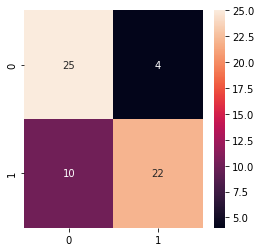


Reporte de metricas:

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.85      0.69      0.76        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61


------------------------------------------------------------
Matriz de confusión del algoritmo LDA



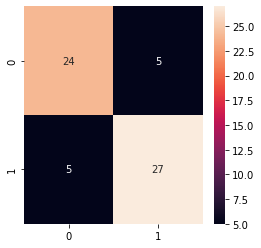


Reporte de metricas:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


------------------------------------------------------------


In [22]:
for a in algoritmos:
  algoritmo = algoritmos[a]
  # Entrenamos los algoritmos
  algoritmo.fit(X_train , y_train)

  # Predecimos X_test
  y_pred = algoritmo.predict(X_test)

  # Graficamos la matrix de confusión
  plt.figure(figsize=(4,4))
  print(f'Matriz de confusión del algoritmo {a}\n')
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

  # Reporte de metricas
  reporte = classification_report(y_test, y_pred)
  print(f'\nReporte de metricas:\n\n{reporte}\n')
  print(60 * '-')

Veamos con un gráfico los valores del output para recordar si están balanceados.
 



1    165
0    138
Name: output, dtype: int64


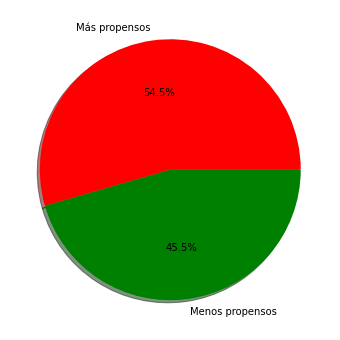

In [23]:
print(datos_output)
labels = ['Más propensos', 'Menos propensos']

plt.figure(figsize=(6,6))
plt.pie(datos_output,
        labels=labels,
        colors=['red','green'],
        shadow = True,
        autopct = '%1.1f%%')
plt.show()

Vemos que los datos no estan desbalanceados. Por lo tanto, el **accuracy** (precisión), es una buena metrica a tener en cuenta para evaluar la efectividad del modelo de aprendizaje.

In [24]:
for i in algoritmos:
  a_accuracy = algoritmos[i]
  a_accuracy.fit(X_train , y_train)
  y_pred = a_accuracy.predict(X_test)
  print(f'Accuracy de {i}:')
  print(f'{accuracy_score(y_test, y_pred)}\n')

Accuracy de Knn:
0.9016393442622951

Accuracy de Bayes:
0.8852459016393442

Accuracy de SVectorial:
0.8688524590163934

Accuracy de Arboles_decision:
0.7868852459016393

Accuracy de LDA:
0.8360655737704918



### Conclusiones y observaciones de este análisis.
 
Dentro de este dataset tenemos una cantidad de 302 pacientes de los cuales el 54%(**cant: 164**) son propensos a sufrir un ataque cardíaco y un 45%(**cant: 138**) no lo son.
 
El modelo de KNN tiene una precisión de 0.90% seguido por el modelo Bayes con un 0.88%.
 
Teniendo en cuenta los gráficos de barra, podemos ver que aquellos que no hacen ejercicio y los que no tienen vasos principales (caa = 0) son propensos a sufrir un ataque cardiaco.